In [743]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import json, ast

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import normaltest

from sktime.forecasting.compose import ForecastByLevel
from sktime.forecasting.arima import AutoARIMA

# Uploading and Wranggling the Data

In [542]:
# Upload into a Dataframe
df = pd.read_csv('Food-&-Beverage-stores.csv')
df

,observation_date,MSRSAK445,MSRSAL445,MSRSAR445,MSRSAZ445,MSRSCA445,MSRSCO445,MSRSCT445,MSRSDE445,MSRSFL445,...,MSRSSD445,MSRSTN445,MSRSTX445,MSRSUT445,MSRSVA445,MSRSVT445,MSRSWA445,MSRSWI445,MSRSWV445,MSRSWY445
0,2019-01-01,3.9,2.9,5.4,4.0,4.5,4.0,4.4,3.7,4.4,...,7.0,4.8,8.1,1.8,4.2,4.3,4.1,2.7,3.5,5.9
1,2019-02-01,-1.1,0.2,-12.3,0.4,0.5,1.7,2.2,0.7,2.3,...,2.3,1.2,2.9,10.2,1.2,0.6,2.3,0.2,-2.8,2.3
2,2019-03-01,-1.6,0.8,-13.1,0.4,-0.6,1.0,-3.8,-0.9,-0.2,...,0.7,0.6,2.5,11.1,2.6,-2.3,-0.6,0.9,-0.4,2.0
3,2019-04-01,2.0,4.1,4.0,5.4,5.2,4.1,2.2,6.7,4.9,...,3.8,5.5,6.8,13.9,5.2,3.4,3.6,5.3,4.3,3.7
4,2019-05-01,1.3,4.6,3.0,2.7,1.7,3.2,0.3,3.7,4.1,...,4.4,5.7,5.0,12.5,4.6,1.1,2.2,3.9,5.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-01,-1.1,0.0,-2.9,-0.7,0.1,0.3,1.6,-1.1,4.0,...,-2.6,-0.1,1.2,-1.8,-0.4,2.0,2.9,-0.2,-1.3,0.0
69,2024-10-01,-3.8,7.1,2.5,2.9,4.6,4.4,4.3,3.1,9.4,...,-2.8,4.9,5.0,2.3,3.6,5.6,3.1,1.1,2.9,3.0
70,2024-11-01,-3.0,4.8,4.8,1.2,6.4,5.6,5.2,-0.5,5.1,...,4.1,2.5,4.3,1.5,2.7,3.3,4.3,-1.2,0.9,4.5
71,2024-12-01,-5.9,4.7,-1.1,0.1,1.8,1.6,1.9,1.4,5.0,...,-0.4,1.8,2.0,0.0,1.5,-2.0,1.9,0.1,0.0,0.9


In [543]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  73 non-null     object 
 1   MSRSAK445         73 non-null     float64
 2   MSRSAL445         73 non-null     float64
 3   MSRSAR445         73 non-null     float64
 4   MSRSAZ445         73 non-null     float64
 5   MSRSCA445         73 non-null     float64
 6   MSRSCO445         73 non-null     float64
 7   MSRSCT445         73 non-null     float64
 8   MSRSDE445         73 non-null     float64
 9   MSRSFL445         73 non-null     float64
 10  MSRSGA445         73 non-null     float64
 11  MSRSHI445         73 non-null     float64
 12  MSRSIA445         73 non-null     float64
 13  MSRSID445         73 non-null     float64
 14  MSRSIL445         73 non-null     float64
 15  MSRSIN445         73 non-null     float64
 16  MSRSKS445         73 non-null     float64
 17 

In [544]:
# Renaming each column to the state abbreviation

for column in df.columns[1:]:
    # Make sure it hasn't been renamed already
    if 'MSRS' not in column: 
        break
    df = df.rename(columns = {column: column[4:6]})
    
df.columns

Index(['observation_date', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [545]:
# Make sure the date is datetime format

df['observation_date'] = pd.to_datetime(df['observation_date'],format = '%Y-%m-%d')
df

,observation_date,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2019-01-01,3.9,2.9,5.4,4.0,4.5,4.0,4.4,3.7,4.4,...,7.0,4.8,8.1,1.8,4.2,4.3,4.1,2.7,3.5,5.9
1,2019-02-01,-1.1,0.2,-12.3,0.4,0.5,1.7,2.2,0.7,2.3,...,2.3,1.2,2.9,10.2,1.2,0.6,2.3,0.2,-2.8,2.3
2,2019-03-01,-1.6,0.8,-13.1,0.4,-0.6,1.0,-3.8,-0.9,-0.2,...,0.7,0.6,2.5,11.1,2.6,-2.3,-0.6,0.9,-0.4,2.0
3,2019-04-01,2.0,4.1,4.0,5.4,5.2,4.1,2.2,6.7,4.9,...,3.8,5.5,6.8,13.9,5.2,3.4,3.6,5.3,4.3,3.7
4,2019-05-01,1.3,4.6,3.0,2.7,1.7,3.2,0.3,3.7,4.1,...,4.4,5.7,5.0,12.5,4.6,1.1,2.2,3.9,5.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-01,-1.1,0.0,-2.9,-0.7,0.1,0.3,1.6,-1.1,4.0,...,-2.6,-0.1,1.2,-1.8,-0.4,2.0,2.9,-0.2,-1.3,0.0
69,2024-10-01,-3.8,7.1,2.5,2.9,4.6,4.4,4.3,3.1,9.4,...,-2.8,4.9,5.0,2.3,3.6,5.6,3.1,1.1,2.9,3.0
70,2024-11-01,-3.0,4.8,4.8,1.2,6.4,5.6,5.2,-0.5,5.1,...,4.1,2.5,4.3,1.5,2.7,3.3,4.3,-1.2,0.9,4.5
71,2024-12-01,-5.9,4.7,-1.1,0.1,1.8,1.6,1.9,1.4,5.0,...,-0.4,1.8,2.0,0.0,1.5,-2.0,1.9,0.1,0.0,0.9


# Questions

1. **How did the food and beverage stores perform in different states during covid 19?**
2. **How did the F&B stores perform during different covid periods?**
    - Compare with states that didn't issue orders of lockdown
3. **Is there a pattern recognition of higher sales during holidays compared to no holidays?**
4. **which state forecasts the most % increase of sales in the next 6 months of the available data?** 

---------

# 1. Stores performance during different covid periods 

**Based on this link, the recession of Covid in the US started in Feb and ended in April. We will be using this period of time to analyze the performance** 

**However, I will use the full year of 2020 to elimnate seasonal bais and compare it with 2019 and 2021**

*"began in February 2020 and ended roughly two months later, in April 2020"*

https://en.wikipedia.org/wiki/COVID-19_recession#:~:text=The%20National%20Bureau%20of%20Economic,on%20records%20dating%20to%201854.

In [546]:
# label each year relative to covid
df_covid = df.copy()
def label_covid_period(date):
    
    y = date.year
    if y >= 2019 and y < 2020:
        return 'pre covid'
    
    elif y >= 2020 and y < 2021:
        return 'covid'
    
    elif y ==2021:
        return 'post covid'

# Apply the function to the dataframe in a new column
df_covid['covid_period'] = df_covid['observation_date'].apply(label_covid_period)

df_covid[df_covid['covid_period'] == 'covid']


,observation_date,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,covid_period
12,2020-01-01,3.4,-2.5,2.3,-0.1,1.5,2.5,-0.1,-3.2,2.2,...,1.0,1.8,11.7,4.0,19.5,8.6,-0.3,-1.4,9.4,covid
13,2020-02-01,10.5,5.9,8.9,5.8,5.6,7.8,5.6,5.4,7.9,...,9.6,8.9,7.7,12.0,27.6,11.1,7.6,7.1,20.6,covid
14,2020-03-01,26.2,21.0,29.4,25.5,25.6,26.6,27.4,23.0,27.5,...,29.7,21.2,24.6,29.6,54.7,34.7,24.6,23.2,35.3,covid
15,2020-04-01,19.9,15.6,19.5,8.3,11.9,12.0,19.9,8.6,15.3,...,16.7,8.4,9.1,20.5,NaN,19.2,9.5,9.0,26.4,covid
16,2020-05-01,23.2,14.3,20.5,11.7,17.8,14.5,17.4,6.5,18.0,...,17.3,10.9,6.3,14.3,27.4,20.7,5.9,4.6,29.5,covid
17,2020-06-01,17.5,1.9,12.7,8.5,13.3,12.0,14.8,2.7,15.3,...,0.8,11.3,1.7,7.9,-1.5,16.4,2.5,-6.0,25.5,covid
18,2020-07-01,18.6,11.5,18.0,8.2,12.7,11.2,12.4,6.1,17.9,...,14.8,10.3,4.2,14.4,-3.1,18.9,7.0,5.9,20.7,covid
19,2020-08-01,13.3,3.0,9.3,3.7,8.0,7.0,11.5,1.0,6.6,...,6.9,5.6,1.0,9.5,-5.8,15.1,1.5,-0.6,17.2,covid
20,2020-09-01,15.4,-2.4,10.3,8.4,15.5,11.3,19.8,2.3,16.7,...,-5.7,8.8,1.6,6.1,19.5,18.0,3.2,-7.2,23.0,covid
21,2020-10-01,13.4,-3.3,10.7,7.1,13.3,11.3,21.0,2.2,15.0,...,-5.3,9.0,2.0,7.5,23.9,18.4,3.6,-7.9,18.4,covid


In [547]:
# find the mean of percentage change of every state at different covid periods

avg_percent_by_period = df_covid.groupby('covid_period').mean().drop(columns = 'observation_date')
avg_percent_by_period

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
covid_period,,,,,,,,,,,,,,,,,,,,,
covid,15.750,6.791667,13.866667,8.116667,11.841667,11.333333,14.225000,5.916667,13.758333,5.625000,...,15.116667,9.291667,9.216667,7.000000,12.266667,13.845455,17.733333,6.700000,2.875,21.225000
post covid,-7.675,12.100000,3.375000,10.375000,8.316667,9.191667,3.458333,9.475000,5.833333,7.883333,...,6.133333,7.991667,11.033333,7.858333,-8.041667,-22.260000,8.191667,8.666667,8.250,2.283333
pre covid,2.325,5.066667,1.633333,3.125000,2.141667,3.308333,0.691667,2.600000,3.108333,3.758333,...,4.541667,5.675000,5.058333,11.508333,3.983333,10.566667,2.466667,3.316667,3.850,5.075000


In [548]:
# the total average of the US sale percentage change

total_avg_percent_by_period = avg_percent_by_period.mean(axis = 1)
df_total_avg_percent_by_period = pd.DataFrame({'covid_period':total_avg_percent_by_period.index, 'sale_percent_change': total_avg_percent_by_period.values})
df_total_avg_percent_by_period

,covid_period,sale_percent_change
0,covid,10.066798
1,post covid,4.902177
2,pre covid,3.863788


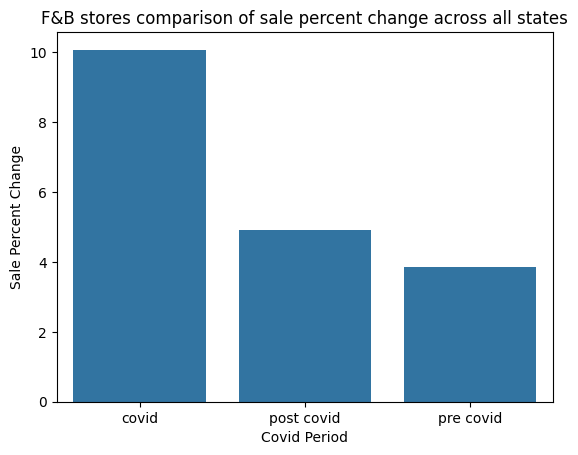

In [549]:
# Creating a bar plot of the different covid periods

sns.barplot(x = 'covid_period', y = 'sale_percent_change', data = df_total_avg_percent_by_period)
plt.title('F&B stores comparison of sale percent change across all states')
plt.xlabel('Covid Period')
plt.ylabel('Sale Percent Change')
plt.show()

**Interpretation:**
- F&B stores had an increase of 10% of their sales in covid over 2019 (pre covid)
- The percent change in 2021 (4.9%) decreased to half the amount of the increase in 2020, but sales kept growing at a 4.9% during 2021
- This indicats several insights: 
    - Covid supported the F&B industry across the US
    - People were eating and ordering more during covid (probably due to depression)
    - A second more plausable reason is the spread of fear across the US, so people bought lots of food and beverages during covid
- The second reason of increase sales due to fear is supported by the sharp decrease of sales rate in 2021; people felt more secure

# 2. Stores performance at different states during covid lockdown 

In [550]:
# Preprocessing the data to find the highest and lowest percentage sale change
# covid only dataframe with year column 
df_covid = df_covid.loc[df_covid['covid_period'] == 'covid'].copy()
df_covid['year'] = df_covid['observation_date'].dt.year

# list of all states
state_col = [c for c in df_covid.columns if c not in ('observation_date','covid_period','year')]

# group the mean of all states during covid - 2020
covid_avg_per_state = df_covid.groupby('year')[state_col].mean().T.reset_index().rename(columns={'index':'state'})

covid_avg_per_state.head()

year,state,2020
0,AK,15.750000
1,AL,6.791667
2,AR,13.866667
3,AZ,8.116667
4,CA,11.841667


In [551]:
# The state with the most percentage increase during covid

highest_state = covid_avg_per_state.loc[covid_avg_per_state[2020].idxmax()]['state']

print(f"The state that had the biggest average %-increase in 2020 is {highest_state}")
print(f"%-increase of {covid_avg_per_state.loc[covid_avg_per_state[2020].idxmax()][2020]}")

The state that had the biggest average %-increase in 2020 is WY
%-increase of 21.224999999999998


In [552]:
# Finding the state with the least increase of sale percentage during covid

least_increase_state = covid_avg_per_state.loc[covid_avg_per_state[2020].idxmin()]['state']

print(f"The state that had the least average %-increase in 2020 is {least_increase_state}")
print(f"%-increase of {covid_avg_per_state.loc[covid_avg_per_state[2020].idxmin()][2020]}")

The state that had the least average %-increase in 2020 is HI
%-increase of 0.23333333333333325


**Visualization**

In [553]:
# Preprocessing the data for a graph

# Create a single row with the avg of each state
covid_avg_heatmap =  df_covid.groupby('year')[state_col].mean().T

# Sort the percentages by decending order
covid_avg_heatmap = covid_avg_heatmap.sort_values(by = 2020, ascending=False)

# Separate the data of the highest and lowest states
highest_10 = covid_avg_heatmap.head(5)
lowest_10 = covid_avg_heatmap.tail(5)

# get a dataframe of the lowest and highest states for a better graph
lowest_and_highest_states = pd.concat([highest_10, lowest_10])


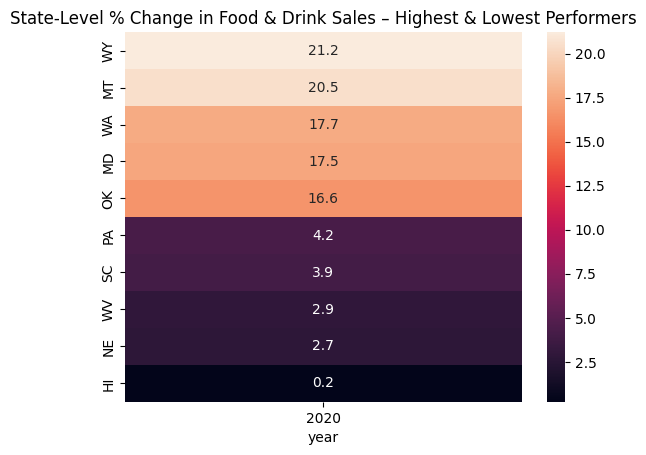

In [554]:
# Create the heatmap

sns.heatmap(lowest_and_highest_states,annot=True, fmt=".1f")
plt.title('State‐Level % Change in Food & Drink Sales – Highest & Lowest Performers')
plt.show()

**highest percent change increase: Wyoming, Montana, Washington, Maryland, Oklahoma**

**lowest percent change increase: Hawaii, Nebraska, West Viginia, South Carolina, Pennsylvania**

**Does this correlate with Covid Policy of each individual state? Did the Covid policies for each state have a direct impact on the F&B percent change?**

*To answer the question, I will get data on the alcohol, face masks and stay at home policies.*

https://statepolicies.com/

*Uploading the data*

In [555]:
# Covid Policy data
df_alcohol = pd.read_csv('COVID-19 Alcohol.csv')
df_face_masks = pd.read_csv('COVID-19 Face Masks.csv')
df_stay_home = pd.read_csv('COVID-19 Stay at Home.csv')

In [556]:
# Getting the necessary columns from the alcohol covid policies 

df_alcohol_needed = df_alcohol[['State Abbreviation','Alcohol/Liquor Stores Open']].sort_values(by = 'State Abbreviation').reset_index(drop=True)
df_alcohol_needed.head()

,State Abbreviation,Alcohol/Liquor Stores Open
0,AK,1
1,AL,1
2,AR,1
3,AZ,1
4,CA,1


In [557]:
# Getting the necessary columns from the face mask covid policies 

df_face_masks_needed = df_face_masks[['State Abbreviation','Face mask mandate enforced by fines']].sort_values(by = 'State Abbreviation').reset_index(drop=True)
df_face_masks_needed.head()

,State Abbreviation,Face mask mandate enforced by fines
0,AK,1
1,AL,0
2,AR,1
3,AZ,0
4,CA,0


In [558]:
# Getting the necessary columns from the stay home covid policies 

df_stay_home_needed = df_stay_home[['State Abbreviation']].sort_values(by = 'State Abbreviation').reset_index(drop=True).copy()

# Parse the data into a datetime format to get the duration
df_stay_home_needed['start'] = pd.to_datetime(df_stay_home['Stay at home/shelter in place'], errors='coerce')
df_stay_home_needed['end'] = pd.to_datetime(df_stay_home['End stay at home/shelter in place '], errors='coerce')

# Finding mean of the start and end of home stay policies for later purpose
stay_home_start_mean = df_stay_home_needed['start'].mean()
stay_home_end_mean = df_stay_home_needed['end'].mean()

# Get the date only, no need for the exact hourly timings
df_stay_home_needed['start'] = df_stay_home_needed['start'].dt.date
df_stay_home_needed['end'] =  df_stay_home_needed['end'].dt.date

# Subtract to get the duration in days
df_stay_home_needed['duration_days'] = (df_stay_home_needed['end'] - df_stay_home_needed['start'])

# Getting the number of days only
df_stay_home_needed['duration_days'] = (df_stay_home_needed['duration_days'].astype(str).str.extract(r'(\d+)', expand=False))
                                        
# Deal with NaT to 0
df_stay_home_needed[['start','end','duration_days']] = df_stay_home_needed[['start','end','duration_days']].fillna(0)

df_stay_home_needed.head()

,State Abbreviation,start,end,duration_days
0,AK,2020-04-04,2020-04-30,26
1,AL,2020-03-28,2020-04-24,27
2,AR,2020-03-31,2020-05-16,46
3,AZ,0,0,0
4,CA,2020-03-19,2021-01-25,312


*Creating the df_covid dataframe during the policy period only (which is the mean start and end date of the stay home policy)*


In [559]:
# The mean start and end
print(f"the mean start date of stay home policies among states is {stay_home_start_mean}")
print(f"the mean end date of stay home policies among states is {stay_home_end_mean}")


the mean start date of stay home policies among states is 2020-03-27 18:00:00
the mean end date of stay home policies among states is 2020-05-28 17:27:16.363636480


In [560]:
# Filter to the immediate policy impact
df_covid_immediate_impact = df_covid[(df_covid['observation_date'] < '2020-06-01') & (df_covid['observation_date'] > '2020-02-01')]
df_covid_immediate_impact['policy_impact_period'] = 'immediate_impact'
df_covid_immediate_impact

/var/folders/p6/7rqrp6w17vl0ny3w4x6480br0000gn/T/ipykernel_53083/3638949906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_immediate_impact['policy_impact_period'] = 'immediate_impact'


,observation_date,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,UT,VA,VT,WA,WI,WV,WY,covid_period,year,policy_impact_period
14,2020-03-01,26.2,21.0,29.4,25.5,25.6,26.6,27.4,23.0,27.5,...,24.6,29.6,54.7,34.7,24.6,23.2,35.3,covid,2020,immediate_impact
15,2020-04-01,19.9,15.6,19.5,8.3,11.9,12.0,19.9,8.6,15.3,...,9.1,20.5,NaN,19.2,9.5,9.0,26.4,covid,2020,immediate_impact
16,2020-05-01,23.2,14.3,20.5,11.7,17.8,14.5,17.4,6.5,18.0,...,6.3,14.3,27.4,20.7,5.9,4.6,29.5,covid,2020,immediate_impact


In [561]:
# Grouping the three months into one period
df_covid_immediate_impact_grp = df_covid_immediate_impact.groupby('policy_impact_period')[state_col].mean().T.reset_index()
df_covid_immediate_impact_grp.head()

policy_impact_period,index,immediate_impact
0,AK,23.100000
1,AL,16.966667
2,AR,23.133333
3,AZ,15.166667
4,CA,18.433333


*Combining the dateframes*

In [562]:
# merge two dataframes to combine with the third one
df_temp = pd.merge(df_alcohol_needed, df_face_masks_needed, on = 'State Abbreviation')

# Renmae the columns in the stay home policy df to distingush the column in the combined df
if 'stay_home_start' not in df_stay_home_needed.columns:
    df_stay_home_needed = df_stay_home_needed.rename(columns={'start':'stay_home_start','end': 'stay_home_end','duration_days':'stay_home_duration_days'})

# Merging the two combined dataframes of alcohol and face masks policies with the stay home policies dataframe
df_covid_policy_combined = pd.merge(df_stay_home_needed, df_temp, on = 'State Abbreviation')

df_covid_policy_combined.head()

,State Abbreviation,stay_home_start,stay_home_end,stay_home_duration_days,Alcohol/Liquor Stores Open,Face mask mandate enforced by fines
0,AK,2020-04-04,2020-04-30,26,1,1
1,AL,2020-03-28,2020-04-24,27,1,0
2,AR,2020-03-31,2020-05-16,46,1,1
3,AZ,0,0,0,1,0
4,CA,2020-03-19,2021-01-25,312,1,0


In [563]:
# Combining the policies with the percent change dataframe

# Rename the columns to match to have a common column
df_covid_immediate_impact_grp = df_covid_immediate_impact_grp.rename(columns={'index': 'State Abbreviation', 'immediate_impact': 'percent_change'})

df_rate_change_policy = pd.merge(df_covid_immediate_impact_grp, df_covid_policy_combined, on = 'State Abbreviation', how = 'outer')

df_rate_change_policy.head()


,State Abbreviation,percent_change,stay_home_start,stay_home_end,stay_home_duration_days,Alcohol/Liquor Stores Open,Face mask mandate enforced by fines
0,AK,23.100000,2020-04-04,2020-04-30,26,1,1
1,AL,16.966667,2020-03-28,2020-04-24,27,1,0
2,AR,23.133333,2020-03-31,2020-05-16,46,1,1
3,AZ,15.166667,0,0,0,1,0
4,CA,18.433333,2020-03-19,2021-01-25,312,1,0


*Correlation between percent change rate and the policies*

In [564]:
# the correlation

rate_change_policies_corr = df_rate_change_policy[['percent_change','stay_home_duration_days','Alcohol/Liquor Stores Open','Face mask mandate enforced by fines']].corr()
rate_change_policies_corr


,percent_change,stay_home_duration_days,Alcohol/Liquor Stores Open,Face mask mandate enforced by fines
percent_change,1.000000,-0.105634,0.015039,-0.098927
stay_home_duration_days,-0.105634,1.000000,-0.127201,-0.117389
Alcohol/Liquor Stores Open,0.015039,-0.127201,1.000000,0.992392
Face mask mandate enforced by fines,-0.098927,-0.117389,0.992392,1.000000


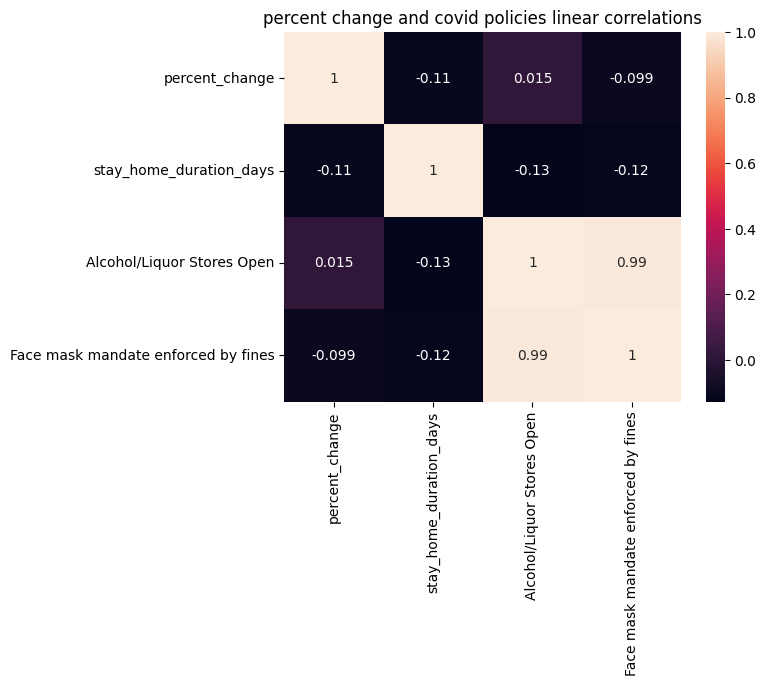

In [565]:
# Plotting the correlation between all the features
sns.heatmap(rate_change_policies_corr,annot=True)
plt.title('percent change and covid policies linear correlations')
plt.show()

**Interpretation:**
- There is barely any linear and surface correlation between covid policies and percent rate change
- Except for a slight negative relation between the percent rate change and the stay at home policy
- However, the negative relation was expecteed to be higher given that home stay might influence the percent change of F&B sales

# 3. Pattern Recognition in my Data (Expecting spikes during holidays and covid shock)

**unsupervised clustering analysis to discover any patterns**

*Preprocessing the data*

In [566]:
# Creating a month column to group by that
df['month'] = df['observation_date'].dt.month

# Seleceting numerical columns only
vars = df.columns[1:-2]

# Group the numerical columns by month 
df_months_grp = df.groupby('month')[vars].mean()

df_months_grp

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV
month,,,,,,,,,,,,,,,,,,,,,
1,3.557143,7.471429,4.942857,5.414286,4.885714,4.757143,3.871429,3.157143,6.357143,5.828571,...,2.442857,5.600000,9.314286,7.400000,6.457143,1.971429,8.250000,6.685714,4.614286,3.514286
2,5.133333,8.000000,2.500000,5.833333,4.783333,4.833333,5.716667,4.466667,6.700000,6.616667,...,3.816667,6.100000,10.416667,7.700000,7.600000,3.216667,11.440000,7.000000,5.516667,4.166667
3,4.066667,7.600000,2.533333,5.083333,4.283333,4.650000,4.966667,4.033333,6.666667,6.216667,...,3.633333,6.033333,10.416667,7.033333,7.383333,3.683333,7.416667,6.966667,5.466667,4.183333
4,4.500000,7.400000,4.333333,5.416667,4.750000,4.300000,5.166667,4.316667,6.050000,5.733333,...,3.216667,5.100000,9.950000,7.116667,7.016667,3.133333,0.180000,6.650000,5.083333,3.733333
5,4.183333,7.750000,4.333333,5.400000,4.433333,4.383333,5.050000,4.033333,6.583333,5.900000,...,3.383333,5.350000,10.116667,7.016667,6.716667,3.000000,5.433333,6.883333,5.166667,3.966667
6,3.783333,9.716667,4.733333,3.866667,3.683333,4.083333,4.233333,4.450000,6.433333,6.116667,...,4.250000,4.700000,12.716667,6.683333,7.016667,3.050000,4.200000,6.233333,5.616667,6.266667
7,4.583333,7.783333,4.566667,5.650000,4.583333,4.500000,5.033333,3.900000,6.533333,6.050000,...,3.783333,5.383333,10.033333,7.433333,7.133333,3.066667,4.433333,6.866667,5.450000,4.100000
8,4.133333,7.950000,4.233333,5.550000,4.733333,4.450000,5.466667,3.650000,6.883333,6.083333,...,3.616667,5.716667,9.983333,7.216667,6.933333,2.716667,4.966667,6.966667,5.033333,4.000000
9,4.483333,7.966667,4.133333,5.416667,4.166667,4.333333,5.466667,3.966667,6.733333,5.766667,...,3.100000,5.100000,10.383333,6.833333,6.816667,2.433333,4.600000,6.900000,5.083333,3.900000


In [567]:
# Grouped by state
df_states = df_months_grp.T.copy()
df_states = df_states.dropna(axis=0, how='any')

df_states.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
AK,3.557143,5.133333,4.066667,4.500000,4.183333,3.783333,4.583333,4.133333,4.483333,3.266667,3.583333,3.033333
AL,7.471429,8.000000,7.600000,7.400000,7.750000,9.716667,7.783333,7.950000,7.966667,8.883333,7.983333,7.950000
AR,4.942857,2.500000,2.533333,4.333333,4.333333,4.733333,4.566667,4.233333,4.133333,4.766667,4.433333,3.866667
AZ,5.414286,5.833333,5.083333,5.416667,5.400000,3.866667,5.650000,5.550000,5.416667,5.700000,5.433333,5.333333
CA,4.885714,4.783333,4.283333,4.750000,4.433333,3.683333,4.583333,4.733333,4.166667,4.900000,4.683333,4.666667


In [568]:
# Grouped by region for fewer variables

#  Region map produced from ChatGPT
region_map = {
    'CT':'Northeast','ME':'Northeast','MA':'Northeast','NH':'Northeast',
    'RI':'Northeast','VT':'Northeast','NJ':'Northeast','NY':'Northeast',
    'PA':'Northeast',
    'IL':'Midwest','IN':'Midwest','MI':'Midwest','OH':'Midwest','WI':'Midwest',
    'IA':'Midwest','KS':'Midwest','MN':'Midwest','MO':'Midwest','NE':'Midwest',
    'ND':'Midwest','SD':'Midwest',
    'DE':'South','FL':'South','GA':'South','MD':'South','NC':'South','SC':'South',
    'VA':'South','DC':'South','WV':'South','AL':'South','KY':'South','MS':'South',
    'TN':'South','AR':'South','LA':'South','OK':'South','TX':'South',
    'AZ':'West','CO':'West','ID':'West','MT':'West','NV':'West','NM':'West',
    'UT':'West','WY':'West','AK':'West','CA':'West','HI':'West','OR':'West',
    'WA':'West'
}

# Have the 12 months as columns
df_months_grp_T = df_months_grp.T

# Make the region the index
df_months_grp_T['region'] = df_months_grp_T.index.map(region_map)

# Groupby region
df_state_region_grp = df_months_grp_T.groupby('region').mean()
df_state_region_grp.columns.name = None

df_state_region_grp



,1,2,3,4,5,6,7,8,9,10,11,12
region,,,,,,,,,,,,
Midwest,4.972619,5.359722,5.397222,4.822222,4.945833,4.779167,5.191667,5.019444,4.934722,4.562500,5.243056,4.831944
Northeast,3.326455,4.735556,4.307778,4.090000,4.208889,3.691111,4.122222,4.212593,3.780000,4.283704,4.612593,3.610741
South,5.035714,5.560417,5.550000,5.279167,5.460417,6.876979,5.488542,5.440625,4.884375,5.695312,5.528125,5.227083
West,6.103571,6.561111,5.879167,5.820833,5.850000,5.294444,6.054167,5.948611,5.927778,6.095833,6.069444,5.858333


*Start hierarchical clustering for all states*

In [569]:
# Create the matrix
X = df_states.values
distance_matrix = linkage(X, method='ward', metric = 'euclidean')

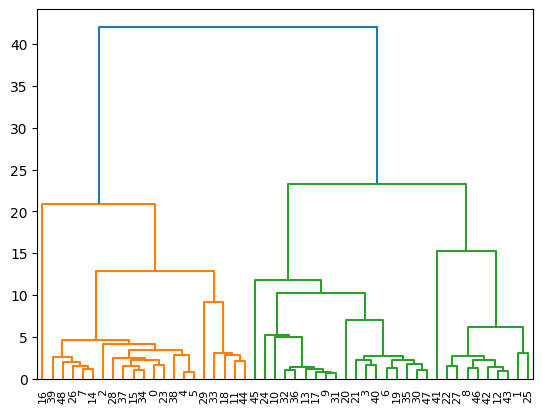

In [570]:
# Create the dendrogram to know the number of clusters

dend = dendrogram(distance_matrix)
plt.show()

*four clusters seems to be the most optimal to discover any grouping*

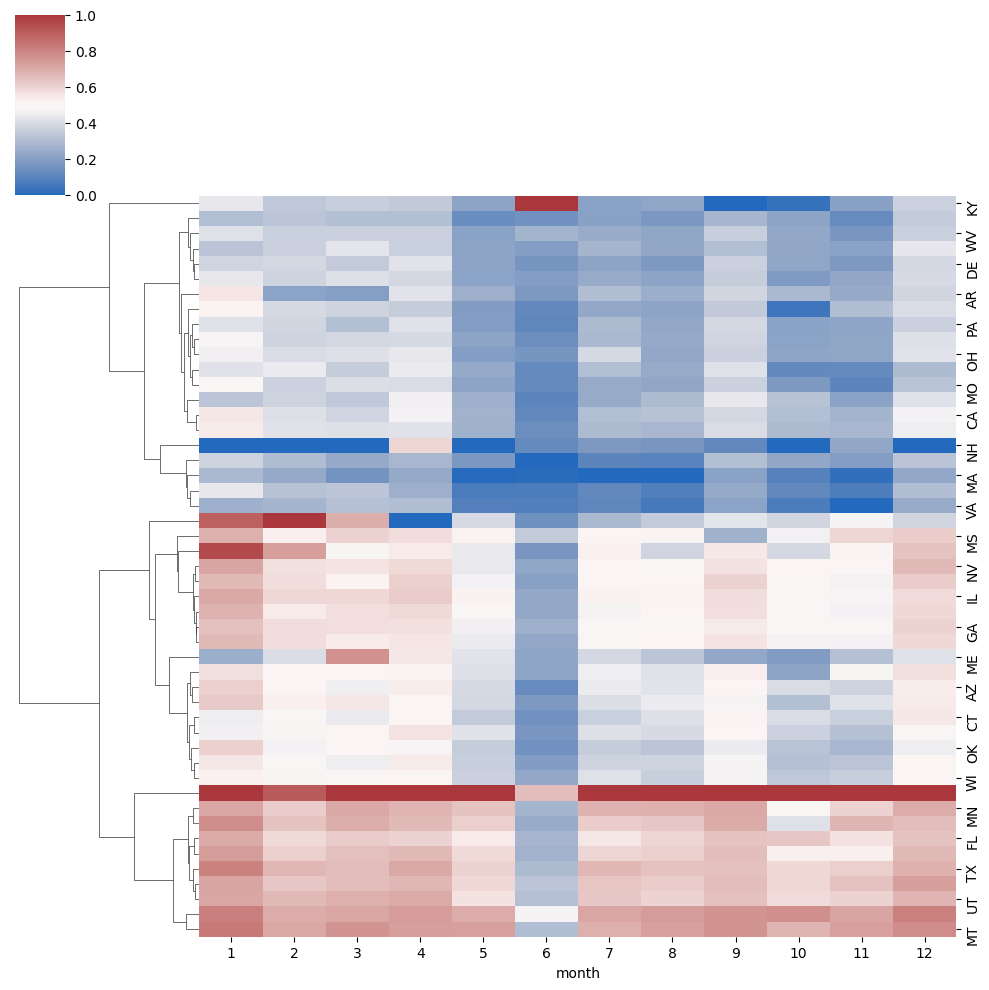

In [571]:
#https://seaborn.pydata.org/generated/seaborn.clustermap.html

# Create a column with cluster labeling
df_states['labels'] = fcluster(distance_matrix, 4, criterion='maxclust')

# Create a heatmap for all states and months - see any correlation and spikes
sns.clustermap(df_states.drop('labels', axis=1),row_linkage=distance_matrix, col_cluster=False,cmap='vlag', standard_scale=1)
plt.show()

**Interpretation** 
 - The June trough is the single deepest dip across every state, showing a nearly universal slowdown in F&B sales growth around month six.

 - A group of states including Kentucky, West Virginia, and Pennsylvania exhibits very muted seasonality, with monthly changes rarely moving more than a few percentage points.

 - California, New Hampshire, and Virginia form a cluster characterized by a strong spring surge in March–April, followed by a pronounced June decline and a modest holiday uptick.

 - Mississippi, Nevada, and Illinois show a sharp peaks in both spring and late fall, creating two distinct spikes in their year‐over‐year growth profiles.

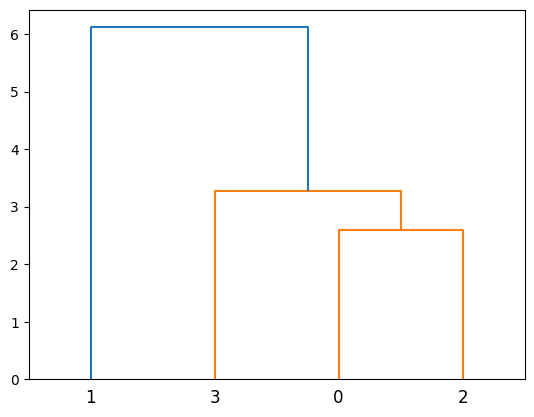

In [572]:
# Choosing values only to apply to the matrix
X = df_state_region_grp.values
distance_matrix = linkage(X, method='ward', metric = 'euclidean')

# Create a dendrogram again to know th emost optimal number of clusters
dend = dendrogram(distance_matrix)
plt.show()

*four clusters seems to be the most optimal to discover any grouping*

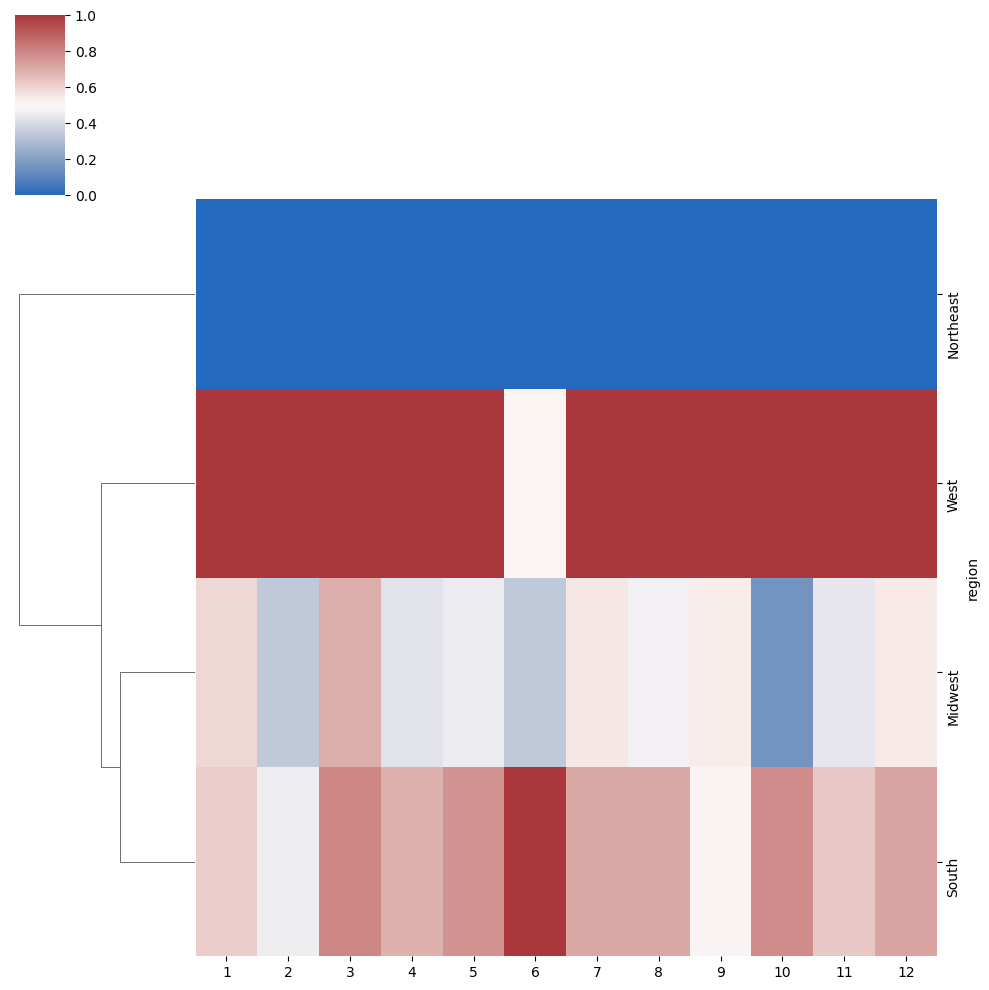

In [573]:
# Create a column with cluster labeling
df_state_region_grp['labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Create a heatmap for regions - see any correlation and spikes
sns.clustermap(df_state_region_grp.drop('labels', axis=1),row_linkage=distance_matrix, col_cluster=False,cmap='vlag', standard_scale=1)
plt.show()

**Interpretation**
- The Midwest and South share a similar profile: moderate gains in spring, a clear June dip, and a typical holiday rebound at year’s end.

- The Northeast remains below its own annual average in every month, indicating it experienced the weakest year‐over‐year growth of all regions.

- The West stays above its mean for nearly every month, signaling the strongest and most sustained growth throughout 2019–2025.

- Overall, while all regions dip in early summer, the West leads the rebound, the Northeast lags behind, and the Midwest and South occupy the middle ground.

# 4. Predicting the next 6 Months of Percent change in F&B stores across States

**I will be using ARIMA model to predict**

With the help of this video: https://www.youtube.com/watch?v=-aCF0_wfVwY

*Preprocessing for a data split*

In [593]:
# make sure month column is not there
if 'month' in df.columns:
    df.drop(columns = 'month', inplace=True)

# set the time series as the index
if df.index.name != 'observation_date':
    df.set_index('observation_date', inplace = True)

df_model =df.copy()
df_model

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
observation_date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.9,2.9,5.4,4.0,4.5,4.0,4.4,3.7,4.4,3.8,...,7.0,4.8,8.1,1.8,4.2,4.3,4.1,2.7,3.5,5.9
2019-02-01,-1.1,0.2,-12.3,0.4,0.5,1.7,2.2,0.7,2.3,2.3,...,2.3,1.2,2.9,10.2,1.2,0.6,2.3,0.2,-2.8,2.3
2019-03-01,-1.6,0.8,-13.1,0.4,-0.6,1.0,-3.8,-0.9,-0.2,0.5,...,0.7,0.6,2.5,11.1,2.6,-2.3,-0.6,0.9,-0.4,2.0
2019-04-01,2.0,4.1,4.0,5.4,5.2,4.1,2.2,6.7,4.9,5.0,...,3.8,5.5,6.8,13.9,5.2,3.4,3.6,5.3,4.3,3.7
2019-05-01,1.3,4.6,3.0,2.7,1.7,3.2,0.3,3.7,4.1,4.6,...,4.4,5.7,5.0,12.5,4.6,1.1,2.2,3.9,5.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,-1.1,0.0,-2.9,-0.7,0.1,0.3,1.6,-1.1,4.0,0.0,...,-2.6,-0.1,1.2,-1.8,-0.4,2.0,2.9,-0.2,-1.3,0.0
2024-10-01,-3.8,7.1,2.5,2.9,4.6,4.4,4.3,3.1,9.4,5.4,...,-2.8,4.9,5.0,2.3,3.6,5.6,3.1,1.1,2.9,3.0
2024-11-01,-3.0,4.8,4.8,1.2,6.4,5.6,5.2,-0.5,5.1,0.9,...,4.1,2.5,4.3,1.5,2.7,3.3,4.3,-1.2,0.9,4.5


In [598]:
x = df_model.index # Feature
y = df_model.values # Target

*Spliting the data into train and test for feature and target*

In [602]:
split_point = int(len(df_model) * 0.8) # 80% training data to build the model on and 20% testing to test the model
train = df_model.iloc[:split_point]
test = df_model.iloc[split_point:]

**I need to stablize the variance of across the states**

**I will be using a tool called yeo Johonson - I used ChatGPT to find me tools to stablize my data for the ARIMA model**

In [628]:
#https://www.numberanalytics.com/blog/guide-yeo-johnson-data-cleaning#step-by-step-implementation
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

# Create the object to transform the data
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Transform both train and test datas
y_train_trans = pt.fit_transform(train.values)
y_test_trans  = pt.transform(test.values)

# Convert back from arrays to dataframes
y_train_df = pd.DataFrame(y_train_trans, index = train.index, columns = train.columns)
y_test_df = pd.DataFrame(y_test_trans, index = test.index, columns = test.columns)

**ARIMA(p,d,q) - have to see how the amount the p,d and q to fit the data into the model**

p: the autoregressor

d: the differencing

q: the moving average

In [664]:
# Create the difference betwen each point in the dataset to prepare the data for a stationary time series check

train_diff = y_train_df.diff()[1:]
test_diff = y_test_df.diff()[1:]


*Before finding p and q, I have to check f the time series is sationary*

In [665]:
# States that dont have stationary tine series
unstationary_states = []

# Check the difference p-value is below 0.05 for each state
# If its not, its added to unstationary_states to get scaled better
result = df.apply(lambda col: adfuller(col.diff().dropna())[1] if adfuller(col.diff().dropna())[1] < 0.05 else unstationary_states.append(col.name))
unstationary_states

['AL', 'CA', 'DE', 'GA', 'MI', 'NC', 'NJ', 'NM', 'NV', 'OR', 'TN', 'WV']

**The unstationary states will be dealt with after building the model and further modifying it**

**After the help of ChatGPT about the next steps, I will be using autoARIMA instead - a more modified ARIMA for univariate time series**

**I tried with ARIMA, but it gets less efficient because the data is filled with univarient columns that each need their own model to forecast to predict the sale percent change for each state**

https://nixtlaverse.nixtla.io/statsforecast/docs/models/autoarima.html

https://www.sktime.net/en/latest/examples/01_forecasting.html?utm_source=chatgpt.com#2.-Forecasters-in-sktime---lookup,-properties,-main-families

**With autoARIMA, it will automatically get p,d and q for the fit (no need for ACF and PACF plotting).**

https://alkaline-ml.com/pmdarima/1.3.0/modules/generated/pmdarima.arima.AutoARIMA.html?utm_source=chatgpt.com

In [ ]:
models_result = {}

for state in y_train_df.columns:
    col_ser = y_train_df[state].fillna(0)

    model = pm.auto_arima(
        col_ser, seasonal = True, m = 12,
        start_p=0, max_p = 3,
        start_q=0, max_q = 3,
        start_P=0, max_P= 1,
        start_Q=0, max_Q= 1,
        stepwise = True,
        suppress_warnings = True
    )

    models_result[state] ={
        "log_likelihood": model.arima_res_.llf,
        "pvalues": model.pvalues(),
        "df_resid": model.df_resid(),
        "residuals": model.resid(),
        'summary': model.summary()
    } 

/Users/diadana/anaconda3/envs/project_9_215/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diadana/anaconda3/envs/project_9_215/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diadana/anaconda3/envs/project_9_215/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diadana/anaconda3/envs/project_9_215/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diadana/anaconda3/envs/project_9_215/lib/python3.11/site-packages/sklearn/utils/d

In [742]:
for state, info in models_result.items():
    resid = info["residuals"]

resid

observation_date
2019-01-01    -1.070407
2019-02-01    -3.113778
2019-03-01    -1.214775
2019-04-01     0.369458
2019-05-01    -2.006914
2019-06-01    -5.844557
2019-07-01     4.936726
2019-08-01     1.824879
2019-09-01    -1.930783
2019-10-01     4.356118
2019-11-01    -0.061605
2019-12-01    -2.982504
2020-01-01     1.941064
2020-02-01     6.493945
2020-03-01    10.635663
2020-04-01    -0.846741
2020-05-01     4.078354
2020-06-01    -1.463196
2020-07-01     2.068677
2020-08-01     0.744549
2020-09-01     4.538966
2020-10-01     1.559490
2020-11-01    -2.544000
2020-12-01     2.929451
2021-01-01    -1.408493
2021-02-01    -2.703171
2021-03-01   -10.555062
2021-04-01     5.758547
2021-05-01    -1.851781
2021-06-01     1.396478
2021-07-01     2.407803
2021-08-01    -0.024118
2021-09-01     3.463768
2021-10-01    -1.605687
2021-11-01     0.334293
2021-12-01     3.217669
2022-01-01    -1.504544
2022-02-01    -0.862833
2022-03-01    -6.156173
2022-04-01     4.056216
2022-05-01    -2.392263

In [754]:
diagnostics = {}

for state, info in models_result.items():
    resid = info["residuals"]  # pandas Series of residuals
    
    mean_resid = resid.mean()
    var_resid  = resid.var()
    
    lb = acorr_ljungbox(resid, lags=[12], return_df=True)
    lb_pvalue = lb["lb_pvalue"].iloc[0]
    
    _, norm_pvalue = normaltest(resid)
    
    diagnostics[state] = {
        "mean_resid":    mean_resid,
        "var_resid":     var_resid,
        "lb_pvalue(12)": lb_pvalue,
        "norm_pvalue":   norm_pvalue,
    }

states_passed_resid = [
    state for state, d in diagnostics.items()
    if abs(d["mean_resid"]) < 1e-6
       and d["lb_pvalue(12)"] > 0.05
       and d["norm_pvalue"] > 0.05
]

print(int(1e-6))


0
